# Part 1 - The Mean

# Introduction

* Throughout this course we'll learn to summarize the distribution of a variable with a single value. Depending on the particular characteristics of a distribution, we'll see that we can summarize it using the mean, the weighted mean, the median, or the mode.
* We'll learn to quantify variability using measures like variance and standard deviation.
* Use z-score to find out if a particular value is common or extreme in a distribution

* the arithmetic mean, or the mean - sum all the values in the distribution, and then divide the total by the number of values


* Think of the mean as the value located at that particular point in the distribution where the total distance of the values below the mean is the same as the total distance of the values that are above the mean.
* this is true for the distribution of any variable measured on an interval or ratio scale.

In [2]:
import pandas as pd

houses = pd.read_csv('AmesHousing_1.txt',sep = '\t')

# 3 The Mean as a Balance point



    Generate 5000 different distributions, measure the total distances above and below the mean, and check whether they are equal. For each of the 5000 iterations of a for loop:
        Set a seed using the seed() function from numpy.random. For the first iteration, the seed number should be 0, for the second iteration it should be 1, for the third it should be 2, and so on.
        Generate randomly a distribution of integers using the randint() function from numpy.random. Pass the right arguments to randint() such that each distribution will:
            Have 10 values.
            The values can range from 0 to 1000.
        Compute the mean of the distribution.
        Measure the total distance above and below the mean.
            Round off each distance to 1 decimal place using the round() function. This will prevent rounding errors at the 13th or 14th decimal place.
        Compare the two sums. If they are equal, then increment a variable named equal_distances with 1. You'll need to define equal_distances outside the loop with a value of 0.

    At the end equal_distances should have a value of 5000. This will confirm that for each of the 5000 distributions the total distance of the values above the mean is equal to the total distance of the values below the mean.


In [3]:
from numpy.random import randint, seed
equal_distances = 0
for i in range(5000):
    seed(i)
    distrib = randint(low=0,high=1000, size=10)
    mean = distrib.mean()
    total_dist_above = 0
    total_dist_below = 0
    for j in range(10):
        if distrib[j] < mean:
            total_dist_below += round(mean-distrib[j], ndigits=1)
        else:
            total_dist_above += round(distrib[j]-mean, ndigits=1)
    if round(total_dist_above,ndigits=1) == round(total_dist_below,ndigits=1):
        equal_distances += 1
#    else:
#        print("TDA "+ str(total_dist_above) + " TDB "+str(total_dist_below))

print(str(equal_distances))    

5000


* population mean denoted with "mu", number of elements denoted with "N"
* sample mean denoted with "x-bar", number of elements denoted with "n"

# 5 An Alternative Definition

# 6


    This data set has variables measured on every scale of measurement: nominal, ordinal, interval and ratio. (If you think this is true, assign the boolean True to the variable one, otherwise assign False.)
    The SalePrice column is continuous and measured on an interval scale. (If you think this is true, assign the boolean True to the variable two, otherwise assign False.)
    In the paper he published here, professor Dean DeCock wrote "The initial Excel file contained 113 variables describing 3970 property sales that had occurred in Ames, Iowa between 2006 an 2010". If we wanted to measure the mean sale prices for all the houses sold between 2006 and 2010 in Ames, Iowa, the data stored in the AmesHousing_1.txt would be a sample. (If you think the last sentence is true, assign the boolean True to the variable three, otherwise assign False.)


In [5]:
import pandas as pd

houses = pd.read_csv('AmesHousing_1.txt', sep='\t')

# A: there are one or two ordinal columns, many nominal variables, all the square footage measurements are ratios, the years are intervals
one = True

# A: sale price is a Ratio -> there is an absolute zero (even if one doesnt appear in the data set)
two = False

# A: we only have 3970 out of an unknown number of actual sales.
three = True

# 7 Mean House Prices

* We can get a good overview of the prices distribution using describe()

```python
print(houses['SalePrice'].describe())
```

In [7]:
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

print(houses['SalePrice'].describe())

function_mean = mean(houses['SalePrice'])

pandas_mean = houses['SalePrice'].mean()

means_are_equal = False

if function_mean == pandas_mean:
    means_are_equal = True


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


# 8 Estimating the Population Mean

When estimating the population mean "mu" using the sample mean, there are three possible scenarios:

1. The sample mean overestimates the population mean . This means that x-bar > mu.
1. The sample mean underestimates the population mean . This means that x-bar < mu.
1. The sample mean is equal to the population mean . This means that x-bar = mu.

When and 1 & 2 occur, sampling error occurs. Remember that sampling error is given by the difference between a population's parameter and a sample's statistic. "mu" is a parameter, and "x-bar" is a statistic, so the sampling error is given by:

sampling_error = "mu" - "x-bar"

Our aim is to reduce the sampling error. Two important factors that influence the sampling error are:

* Sample representativity — the more representative a sample is, the closer x-bar will be to mu.
* Sample size — the larger the sample, the more chances we have to get a representative sample. By consequence, this means less sampling error.



Compute the mean of the SalePrice variable. We'll assume that the data we have is a population relative to the question "What's the mean sale price of a house in Ames, Iowa for the period 2006-2010?".

For each iteration of a for loop that iterates 101 times:

    Sample the SalePrice distribution using the Series.sample() method.
        For the first iteration, the random_state parameter is 0, for the second iteration is 1, for the third is 2, and so on.
        For the first iteration, the sample size is 5.
        The last sample size is 2905 (which is close to 2930, the population's size).
        To achieve that, you'll need to increment the sample size by 29 for every new iteration. Note that you'll first have to define the sample size with a value of 5 outside the loop.
    Compute the sample mean.
    Compute the sampling error. For answer checking purposes, use parameter-statistic, not statistic-parameter

    .

Generate a scatter plot to represent visually how the sampling error changes as the sample size increases.

    Place the sample sizes on the x-axis.
    Place the sampling errors on the y-axis.
    Use plt.axhline() to generate a horizontal line at 0 to illustrate the point where the sampling error is 0.
    Use plt.axvline() to generate a vertical line at 2930 to illustrate the population size.
    Label the x-axis "Sample size".
    Label the y-axis "Sampling error".



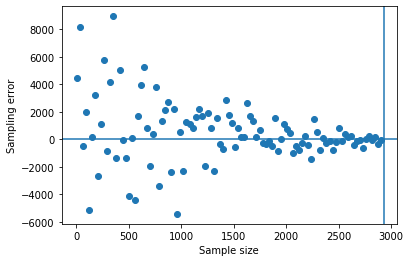

In [10]:
import matplotlib.pyplot as plt

loop_sample_size = 5
sampling_errors = []
sampling_sizes = []
population_mean = houses['SalePrice'].mean()

for i in range(101):
    sample = houses['SalePrice'].sample(random_state=i, n=loop_sample_size)
    sample_mean = sample.mean()
    sampling_error = population_mean - sample_mean
    sampling_errors.append(sampling_error)
    sampling_sizes.append(loop_sample_size)
    loop_sample_size += 29
    
plt.scatter(x=sampling_sizes,y=sampling_errors)
plt.axhline(y=0)
plt.axvline(x=2930)
plt.xlabel("Sample size")
plt.ylabel("Sampling error")
plt.show()

# 9 Estimates from Low-Sized Samples



    Take 10000 samples of sample size 100 from the population of sale prices and measure the mean of each sample. For each of the 10000 iterations of a for loop:
        Use Series.sample() to take a sample of size 100 from the SalePrice variable. The random_state parameter is 0 for the first iteration, 1 for the second iteration, 2 for the third iteration, and so on.
        Compute the mean of the sample.

    Use plt.hist() to generate a histogram to visualize the distribution of sample means.
        Draw a vertical line for the population mean.
        Label the x-axis "Sample mean".
        Label the y-axis "Frequency".
        Set the range of the x-axis to (0,500000). This is the same range as the histogram we built above has. Can you observe any obvious difference between the two histograms now that we've increased the sample size?


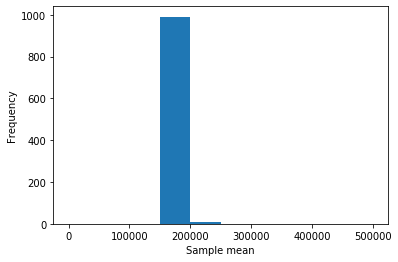

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

houses = pd.read_csv('AmesHousing_1.txt', sep='\t')
sample_means = []

for i in range(1000):
    sample = houses['SalePrice'].sample(n=100, random_state=i)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
plt.hist(sample_means, range=(0,500000))
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.show()

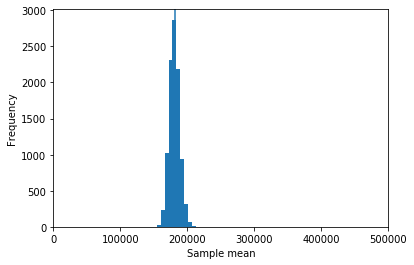

In [5]:
# Version using xlim that matches the expected output

sample_means = []

for i in range(10000):
    sample = houses['SalePrice'].sample(n=100, random_state=i)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
plt.hist(sample_means)
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.axvline(houses['SalePrice'].mean())
plt.xlim(0,500000)
plt.show()

# 10 Variability around the population mean

* Generally, as we increase the sample size, there will be less and less variability around the population mean. If there's less variability, there are less chances to get a poor estimate for the population mean — the worst sample means we can get are fairly close to the population mean, which is good.
* The value we got is the same as the population mean . So on average the sample mean is equal to the population mean. This is true for the distribution above and for any other distribution of real numbers.
* When a statistic is on average equal to the parameter it estimates, we call that statistic an **unbiased estimator**.

Excercise

In [6]:
population = [3, 7, 2]
sample_means = []
unbiased = False

for i in range(3):
    sample = []
    for j in range(3):
        if i != j:
            sample.append(population[j])
    sample_means.append(sum(sample)/len(sample))
    
if sum(population)/len(population) == sum(sample_means)/len(sample_means):
    unbiased = True
print(unbiased)

True


In this mission, we explored in more depth the mean:

    We saw that the mean can be intuitively understood as the "balance point" of a distribution.
    We learned to distinguish conceptually between the sample and the population mean, and we saw that we use different notation for each case.
    We demonstrated with a few examples that the sample mean x-bar is an unbiased estimator for the population mean mu.

In the next mission, we'll explore a few edge cases where it's either impossible to compute the mean, or it's possible but not theoretically sound.

# Part 2 - The Weighted mean and the median

Rather counterintuitively, we noticed in the previous exercise that the mean of the Mean Price column is not equal to that of the SalePrice column. **The root of the problem is related to the fact that we have different number of houses sold each year (notice the Houses Sold column)**:

|Year|Mean Price|Houses Sold|
|---|---|---|
|0|2006|181761.648000|625|
|1|2007|185138.207493|694|
|2|2008|178841.750804|622|
|3|2009|181404.567901|648|
|4|2010|172597.598240|341|

Because each year has a different number of sold houses, the mean of sale prices for each individual year weighs differently in the overall mean. But when we computed the mean of the Mean Price column, we gave each year the same weight because we added all the five mean prices and then divided by 5.

To compute the correct overall mean, we need to:

    Find the sum of prices for each year individually. 
    Add all the sums together.
    Divide the final sum by the number of houses sold (not by the number of years) to find the mean sale price per house.

# Part 3 - The Mode

# Part 4 - Measures of Variability

# Part 5 - Z-Scores



    Generate a kernel density plot for the SalePrice variable to find out how far off $220,000 is from the mean.
        Generate the plot using Series.plot.kde().
            The limits of the x-axis should be the minimum and the maximum value of the SalePrice variable. To set the limits you can use the xlim parameter of Series.plot.kde().
        Plot a vertical line to indicate visually the location of the mean using plt.axvline().
            The color of the line should be black, and its label should be 'Mean'. You can use the color and label parameters of plt.axvline().
        Plot a vertical line to indicate visually the standard deviation distance above the mean — you'll have to generate a vertical line for the sum of the mean and standard deviation.
            Assume that the data is a population and compute the standard deviation without using Bessel's correction.
            The color of the line should be red and its label should be 'Standard deviation'.
        Plot a vertical line for the $220,000 price.
            The color of the line should be orange and its label should be '220000'.
        Display all the labels using plt.legend().

    Examine the graph and figure out whether a price of $220,000 is very expensive. If it's very expensive, assign True to variable named very_expensive, otherwise assign False.


C:\Users\hrasheed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


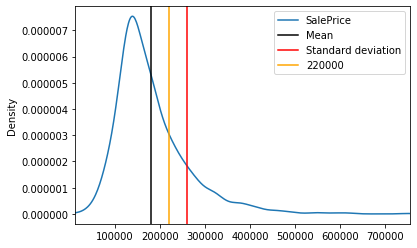

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

houses = pd.read_table('AmesHousing_1.txt')
max_sale_price = houses['SalePrice'].max()
min_sale_price = houses['SalePrice'].min()
houses['SalePrice'].plot.kde(xlim=[min_sale_price,max_sale_price])
plt.axvline(houses['SalePrice'].mean(),color='black',label='Mean')
std_dev_mean = houses['SalePrice'].std() + houses['SalePrice'].mean()
plt.axvline(std_dev_mean,color='red',label='Standard deviation')
plt.axvline(220000,color='orange',label='220000')
plt.legend()
very_expensive = False

Find out the number of standard deviations away from the mean for a price of $220,000 in the distribution of the SalePrice variable.

    Measure the distance between $220,000 and the mean of the SalePrice column.
    Divide the distance by the standard deviation of the SalePrice column (assume the data we have is a population) to find the number of standard deviations away from the mean.
        Assign your result to a variable named st_devs_away.

Does the number of standard deviations match our visual estimate from the last exercise?

In [3]:
price_of_interest = 220000
distance_from_mean = abs(price_of_interest-houses['SalePrice'].mean())
st_devs_away = distance_from_mean/houses['SalePrice'].std(ddof=0)

for any value in a population with mean and standard deviation , the number of standard deviations away from the mean is given by the formula below, where we denote the number of standard deviations away from the mean with :

z = (x - mu)/sigma

The value representing the number of standard deviations away from the mean is commonly known as the standard score, or the z-score. We'll use the term "z-score" throughout our courses.

Z-scores can also be defined fairly easy for samples. For any value x in a sample with mean x-bar and standard deviation s (with Bessel's correction), the z-score is given by the formula:

z = (x -x-bar)/s




    Write a function that takes in a value, the array the value belongs to, and returns the z-score of that value. Inside the function's definition:
        Compute the mean of the array.
        Compute the standard deviation of the array. Make sure your function is flexible enough to compute z-scores for both samples and populations.
            You can use the std() function from numpy.
        Find out the distance between the value and the mean of the array.
        Compute the z-score by dividing the distance to the standard deviation of the array.
        Return the z-score.

    Compute the z-score for min_val, mean_val, max_val, which are already defined in the code editor. Assume that the values come from a population.
        Assign the z-score for min_val to a variable named min_z.
        Assign the z-score for mean_val to a variable named mean_z.
        Assign the z-score for max_val to a variable named max_z.


In [4]:
import numpy as np

def find_z_score(value,array):
    array_mean = array.mean()
    array_std = np.std(array)
    value_distance = value-array_mean
    value_z_score = value_distance/array_std
    return value_z_score

min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

min_z = find_z_score(min_val, houses['SalePrice'])
mean_z = find_z_score(mean_val, houses['SalePrice'])
max_z = find_z_score(max_val, houses['SalePrice'])

# 4/11

Let's say we're working as data analysts for a real estate company, and we want to find the best neighborhood in Ames to invest in (remember that our data set describes sale prices for houses in Ames, Iowa). Our company wants to buy a couple of houses that we can then rent and ideally sell back later at a higher price. We think that location is an important factor driving rental and sale prices, and we want to target our investment based on location.

The company budgeted 10,000,000 for this investment, and the plan is to buy 50 houses of 200,000 each. Depending on the market particularities of each neighborhood, a 200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where a price of 200,000 goes as average because average-priced houses are the ones that are most rented and easiest to sell.

Sale prices are lower in a bad neighborhood, and someone can get a high-quality house for 200,000, but usually people avoid bad neighborhood nonetheless for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.

High-quality neighborhoods will tend to be avoided as well because of the higher sale prices — with 200,000, you may only be able to get a poor-quality house in a good location. So most people will aim for something in the middle — these people make up the market we intend to reach.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

    North Ames.
    College Creek.
    Old Town.
    Edwards.
    Somerset.

Our goal is to find out for which of these neighborhoods a 200,000 house is average-priced. We can solve this task quickly by measuring the z-score for a 200,000 value for each of the five distributions — each of the five neighborhoods has its own distribution of sale prices with its own mean and standard deviation.

**Instructions**: Find out the location for which $200,000 has the z-score closest to 0. Code-wise, there are several ways to complete this task, and we encourage you to think of a way yourself.

In [5]:
houses.head(3)
print(houses.columns)
print(houses['Neighborhood'].unique())

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [18]:
from numpy import std
    
def z_score(value, array, bessel = 0):
    
    if len(array) == 0:
        return 0
    
    mean = sum(array) / len(array)
    
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    if st_dev != 0:
        z = distance / st_dev
    else:
        z=0    
    return z

# Approximately 28 neighborhoods in the dataset
# Simple solution would be to create a forloop that iterates through all of the neighborhoods
# subset the dataframe so that only rows in that neighborhood are returned > population array
# For each neighborhood calculate the z score of $200,000
## z-score function calculates the mean of the array and its std_dev
## z = (value-mean)/std_dev
# store results in hashmap with keys for neighborhood name
# Once the forloop finishes, extract the min value from the hashmap

z_score_hash = {}
neighborhoods = ['North Ames','College Creek','Old Town','Edwards','Somerset']
neighborhoods_of_interest = ['NAmes','CollgCr','OldTown','Edwards','Somerst']
for neighborhood in neighborhoods_of_interest:
    pop_array = houses[houses['Neighborhood'] == neighborhood]
    z_score_hash[neighborhood] = z_score(200000, pop_array['SalePrice'])
    
best_investment_short = min(z_score_hash, key=lambda x: abs(z_score_hash[x]))
print(neighborhoods[neighborhoods_of_interest.index(best_investment_short)])

College Creek


# 5/11

    We've already transformed the distribution of the SalePrice variable to distribution of z-scores and saved the new values to a column named z_prices.
        Compute the mean of the z_prices column and assign the result to a variable named z_mean_price.
        Compute the standard deviation of the z_prices column and assign the result to a variable named z_stdev_price. Assume that you're computing the standard deviation for a population.

    Transform the distribution of the Lot Area variable into a distribution of z-scores.
        Compute the mean of the new distribution of z-scores and assign the result to a variable named z_mean_area.
        Compute the standard deviation of the new distribution of z-scores and assign the result to a variable named z_stdev_area. Assume that you're computing the standard deviation for a population.

    Compare the values of z_mean_price and z_mean_area. What do you observe? How can you explain that?
    Compare the values of z_stdev_price and z_stdev_area. What do you observe? How can you explain that?


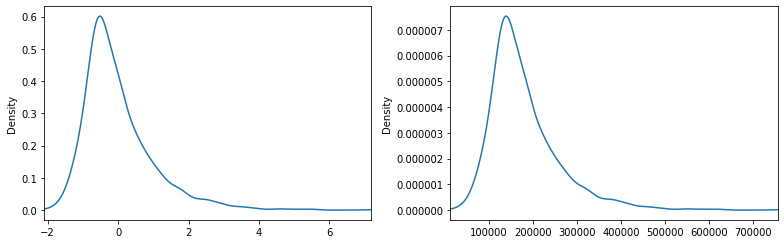

In [22]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )


plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                houses['z_prices'].max()
                                )
                        )
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                     )
                            )
plt.tight_layout() # otherwise the plots will overlay partially
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof = 0)

area_mean = houses['Lot Area'].mean()
area_st_dev = houses['Lot Area'].std(ddof = 0)
houses['z_areas'] = houses['Lot Area'].apply(
    lambda x: ((x - area_mean) / area_st_dev)
    )
z_mean_area = houses['z_areas'].mean()
z_stdev_area = houses['z_areas'].std(ddof=0)

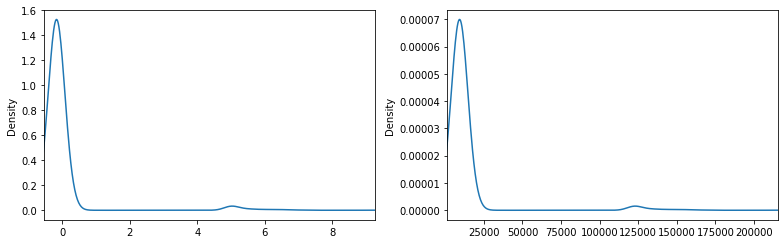

In [24]:
plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_areas'].plot.kde(xlim = (houses['z_areas'].min(),
                                houses['z_areas'].max()
                                )
                        )
plt.subplot(1,2,2)
houses['Lot Area'].plot.kde(xlim = (houses['Lot Area'].min(),
                                    houses['Lot Area'].max()
                                     )
                            )
plt.tight_layout()

In [26]:
print("Z-Mean Prices "+str(z_mean_price))
print("Z-Std Dev Prices "+str(z_stdev_price))
print("Z-Mean Lot Area "+str(z_mean_area))
print("Z-Std Dev Lot Area "+str(z_stdev_area))

Z-Mean Prices -1.1429992333726227e-16
Z-Std Dev Prices 1.0000000000000002
Z-Mean Lot Area 8.771898641662927e-18
Z-Std Dev Lot Area 0.9999999999999997


In [30]:
from numpy import std, mean
population = [0,8,0,8]
pop_mean = sum(population)/len(population)
pop_std = std(population,ddof=0)
population_z = list(map(lambda x: ((x-pop_mean)/pop_std),population))
mean_z = sum(population_z)/len(population_z)
stdev_z = std(population_z,ddof=0)

print("Z Mean"+str(mean_z))
print("Z Std Dev"+str(stdev_z))

Z Mean0.0
Z Std Dev1.0



    Compute the standard deviation of standardized_sample using the sample standard deviation formula, and assign the result to a variable named stdev_sample.
    Inspect the result to see if the standard deviation equals 1.


In [31]:
from numpy import std, mean
sample = [0,8,0,8]

x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)
    
stdev_sample = std(standardized_sample, ddof = 1)

# 8/11 Using Standardization for Comparisons

Standardizing distributions can prove very useful when we need to compare values coming from different systems of measurement. Let's say there are two companies in Ames which offer services in evaluating overall house quality. Inspectors from each company examine houses and rate them with an index score which describes the overall quality of the house.

One thing the two systems have in common is that the index is directly proportional with the house quality — a lower index means lower quality, and a higher index means higher quality. To compare these indices coming from different measurement systems, we can:

    Standardize each distribution of index values (transform each index to a z-score).
    Then compare the z-scores.


In [ ]:
houses2 = pd.read_table('AmesHousing_2.txt')
i1_mean = houses2['index_1'].mean()
i1_std = std(houses2['index_1'],ddof=0)
i2_mean = houses2['index_2'].mean()
i2_std = std(houses2['index_2'],ddof=0)
houses2['index_1_z'] = (houses2['index_1']-i1_mean)/i1_std
houses2['index_2_z'] = (houses2['index_2']-i2_mean)/i2_std
houses2.iloc[0:2]
better = 'first'

# Part 6 - Project